In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

In [363]:
df = pd.read_csv('historical_data.csv')

In [364]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,3441,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,1900,1.0,2.0,2.0,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1900,1.0,0.0,0.0,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,6900,1.0,1.0,2.0,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,3900,6.0,6.0,9.0,650.0


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 9 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   subtotal                                      197428 non-null  int64  
 5   total_onshift_dashers                         181166 non-null  float64
 6   total_busy_dashers                            181166 non-null  float64
 7   total_outstanding_orders                      181166 non-null  float64
 8   estimated_store_to_consumer_driving_duration  196902 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 

# Checking Null Values

In [366]:
df[df.market_id.isnull()]

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
45,NaN,2015-02-09 03:27:37,2015-02-09 04:22:18,5054,2400,94.0,92.0,149.0,287.0
182,NaN,2015-02-01 05:32:34,2015-02-01 06:01:21,5081,1845,33.0,23.0,30.0,581.0
970,NaN,2015-02-17 02:17:43,2015-02-17 03:15:14,1148,3400,36.0,36.0,52.0,653.0
1126,NaN,2015-02-18 03:50:52,2015-02-18 04:15:09,1904,1395,89.0,71.0,72.0,315.0
1625,NaN,2015-02-17 03:49:46,2015-02-17 04:21:27,283,1699,44.0,40.0,69.0,597.0
...,...,...,...,...,...,...,...,...,...
196027,NaN,2015-01-24 02:59:19,2015-01-24 04:16:30,4862,1998,129.0,130.0,232.0,766.0
196561,NaN,2015-02-02 20:49:57,2015-02-02 21:26:34,4077,1975,33.0,34.0,40.0,577.0
197170,NaN,2015-02-01 01:29:54,2015-02-01 01:50:18,1409,2495,74.0,58.0,64.0,163.0
197171,NaN,2015-02-16 19:16:44,2015-02-16 19:56:03,1409,2830,50.0,49.0,56.0,587.0


In [367]:
df[df.actual_delivery_time.isnull()]

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
109,3.0,2015-02-10 21:51:54,NaN,1698,1125,7.0,5.0,4.0,488.0
7670,2.0,2015-02-08 02:54:42,NaN,2340,2860,131.0,123.0,197.0,723.0
78511,4.0,2015-02-15 02:15:45,NaN,901,5050,91.0,75.0,167.0,770.0
115982,4.0,2015-02-16 01:52:49,NaN,1107,2094,53.0,53.0,102.0,433.0
140635,2.0,2015-02-15 02:21:42,NaN,1661,4210,123.0,91.0,176.0,862.0
158967,2.0,2015-02-01 01:21:29,NaN,314,3447,90.0,88.0,109.0,572.0
170416,5.0,2015-02-01 01:36:33,NaN,2651,982,41.0,31.0,31.0,333.0


In [368]:
df = df.dropna(subset=['actual_delivery_time'])

In [369]:
df[df.total_outstanding_orders.isnull()]

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
160,6.0,2015-02-06 01:11:56,2015-02-06 01:42:51,976,575,NaN,NaN,NaN,671.0
161,6.0,2015-02-14 02:07:47,2015-02-14 03:17:37,976,1415,NaN,NaN,NaN,893.0
162,6.0,2015-01-31 21:58:30,2015-01-31 22:55:32,976,650,NaN,NaN,NaN,479.0
163,6.0,2015-02-08 03:28:59,2015-02-08 05:32:11,976,1550,NaN,NaN,NaN,1104.0
164,6.0,2015-01-23 19:29:17,2015-01-23 20:25:25,976,1110,NaN,NaN,NaN,584.0
...,...,...,...,...,...,...,...,...,...
197196,3.0,2015-02-10 19:55:29,2015-02-10 20:33:13,5382,1792,NaN,NaN,NaN,725.0
197197,3.0,2015-02-06 03:05:38,2015-02-06 03:58:16,5382,2923,NaN,NaN,NaN,683.0
197198,3.0,2015-01-23 03:57:56,2015-01-23 04:43:17,5382,3297,NaN,NaN,NaN,725.0
197199,3.0,2015-01-24 03:15:41,2015-01-24 04:04:19,5382,2776,NaN,NaN,NaN,820.0


In [370]:
df = df.dropna(subset=['total_outstanding_orders'])

In [371]:
df[df.estimated_store_to_consumer_driving_duration.isnull()]['estimated_store_to_consumer_driving_duration']

92       NaN
403      NaN
735      NaN
1056     NaN
1418     NaN
          ..
195980   NaN
196097   NaN
197096   NaN
197209   NaN
197416   NaN
Name: estimated_store_to_consumer_driving_duration, Length: 482, dtype: float64

In [372]:
df = df.dropna(subset=['estimated_store_to_consumer_driving_duration'])

In [373]:
df = df.dropna(subset=['market_id'])

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179759 entries, 0 to 197427
Data columns (total 9 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     179759 non-null  float64
 1   created_at                                    179759 non-null  object 
 2   actual_delivery_time                          179759 non-null  object 
 3   store_id                                      179759 non-null  int64  
 4   subtotal                                      179759 non-null  int64  
 5   total_onshift_dashers                         179759 non-null  float64
 6   total_busy_dashers                            179759 non-null  float64
 7   total_outstanding_orders                      179759 non-null  float64
 8   estimated_store_to_consumer_driving_duration  179759 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 

In [375]:
df1 = df.copy()

In [376]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,179759.0,2.748669,1.331756,1.0,2.0,2.0,4.0,6.0
store_id,179759.0,3545.087456,2057.688645,1.0,1686.0,3614.0,5323.0,6987.0
subtotal,179759.0,2699.223460,1829.165815,0.0,1418.0,2225.0,3415.0,26800.0
total_onshift_dashers,179759.0,44.820037,34.541868,-4.0,17.0,37.0,65.0,171.0
total_busy_dashers,179759.0,41.754193,32.160043,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,179759.0,58.067513,52.683946,-6.0,17.0,41.0,85.0,285.0
estimated_store_to_consumer_driving_duration,179759.0,545.889218,218.578610,0.0,383.0,544.0,703.0,2088.0


- total_onshift_dashers, total_busy_dashers, total_outstanding_orders same values less than 0. I will drop those rows

In [377]:
df[df.total_onshift_dashers < 0].head()

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
6034,3.0,2015-02-14 01:48:58,2015-02-14 03:00:13,90,3538,-2.0,2.0,10.0,266.0
12888,3.0,2015-01-21 21:02:32,2015-01-21 21:41:03,2649,986,-2.0,5.0,1.0,787.0
26395,3.0,2015-02-08 18:28:15,2015-02-08 19:17:31,2772,1327,-1.0,6.0,6.0,368.0
30897,3.0,2015-02-07 19:55:46,2015-02-07 20:46:27,793,1202,-1.0,9.0,5.0,773.0
33154,1.0,2015-02-02 22:27:36,2015-02-03 00:08:43,1337,2831,-1.0,13.0,16.0,394.0


In [378]:
df = df[(df.total_onshift_dashers > 0) | (df.total_busy_dashers > 0) | (df.total_outstanding_orders > 0)]

- Dropped negative values fo total_onshift_dashers, total_busy_dashers, total_outstanding_orders

In [379]:
df = df[(df.total_onshift_dashers > 0) | (df.total_busy_dashers > 0) | (df.total_outstanding_orders > 0)]

In [380]:
df.shape

(176367, 9)

# Checking Ourliers

<AxesSubplot:xlabel='total_outstanding_orders'>

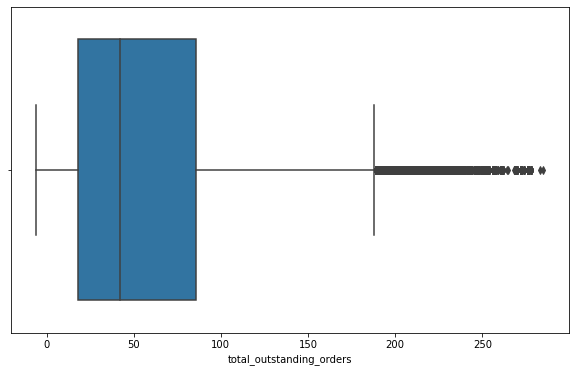

In [381]:
sns.boxplot(df.total_outstanding_orders)

<AxesSubplot:xlabel='total_busy_dashers'>

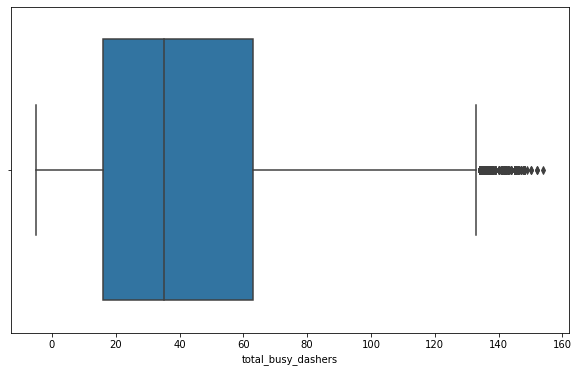

In [382]:
sns.boxplot(df.total_busy_dashers)

<AxesSubplot:xlabel='total_onshift_dashers'>

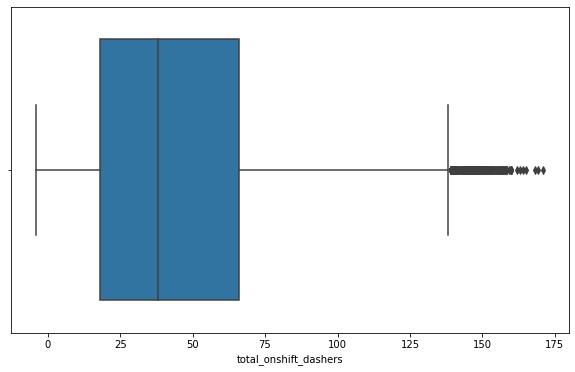

In [383]:
sns.boxplot(df.total_onshift_dashers)

<AxesSubplot:xlabel='estimated_store_to_consumer_driving_duration'>

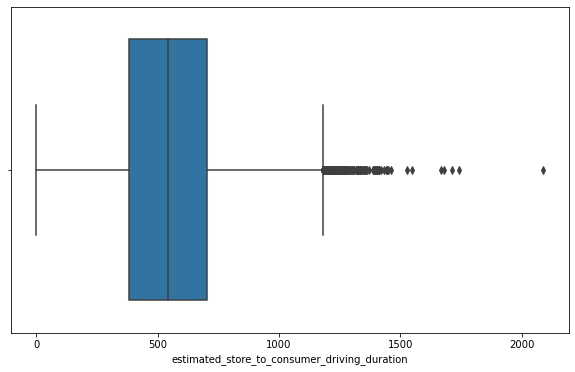

In [384]:
sns.boxplot(df.estimated_store_to_consumer_driving_duration)

In [385]:
df[df.estimated_store_to_consumer_driving_duration <60]

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
1942,3.0,2015-01-25 03:05:25,2015-01-25 04:13:48,2223,9814,12.0,11.0,18.0,31.0
2599,1.0,2015-01-23 01:58:18,2015-01-23 02:28:11,6025,2650,46.0,46.0,49.0,33.0
3696,1.0,2015-02-03 21:46:41,2015-02-03 22:23:34,6025,1200,21.0,22.0,24.0,54.0
4078,4.0,2015-02-16 05:27:49,2015-02-16 05:43:15,1699,1850,14.0,11.0,14.0,56.0
4097,4.0,2015-01-27 21:24:52,2015-01-27 21:54:44,1699,1500,33.0,21.0,21.0,57.0
...,...,...,...,...,...,...,...,...,...
195048,1.0,2015-02-16 20:28:47,2015-02-16 20:54:31,3976,1095,24.0,23.0,33.0,33.0
195072,4.0,2015-02-10 20:37:59,2015-02-10 21:07:54,3976,1699,25.0,24.0,26.0,36.0
195315,2.0,2015-02-09 01:40:50,2015-02-09 02:19:25,5789,3795,115.0,75.0,127.0,51.0
196172,2.0,2015-02-10 20:41:59,2015-02-10 21:11:32,4862,896,58.0,50.0,65.0,56.0


- Dropped estimated_store_to_consumer_driving_duration values less than 60 seconds

In [386]:
df = df[df.estimated_store_to_consumer_driving_duration >60]

- Changed order created time and delivered time type as dateframe to analyze the data easily

In [387]:
df['created_at'] =  pd.to_datetime(df['created_at'])

In [388]:
df['actual_delivery_time'] =  pd.to_datetime(df['actual_delivery_time'])

- Created Target feature as a duration in seconds

In [389]:
df['duration'] = df.actual_delivery_time - df.created_at

In [390]:
df['duration'] = df['duration'].dt.total_seconds()

In [391]:
df['duration']

0         3779.0
1         4024.0
2         1781.0
3         3075.0
4         2390.0
           ...  
197423    3907.0
197424    3383.0
197425    3008.0
197426    3907.0
197427    2228.0
Name: duration, Length: 176064, dtype: float64

# Analyze Duration Values

In [392]:
df[df.duration > 10000]

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,duration
2517,4.0,2015-01-29 20:44:13,2015-01-30 01:57:42,6045,779,77.0,72.0,109.0,649.0,18809.0
2921,2.0,2015-01-30 20:42:02,2015-01-30 23:41:42,1997,1299,49.0,35.0,45.0,372.0,10780.0
5567,3.0,2015-02-03 21:30:37,2015-02-04 01:07:53,4766,5034,25.0,24.0,25.0,260.0,13036.0
7188,4.0,2015-02-12 02:11:02,2015-02-12 05:18:56,3388,4195,104.0,104.0,172.0,446.0,11274.0
10579,5.0,2015-01-23 04:55:18,2015-01-23 07:56:26,410,2700,19.0,6.0,6.0,662.0,10868.0
...,...,...,...,...,...,...,...,...,...,...
193893,1.0,2015-02-13 17:02:00,2015-02-13 21:44:23,1339,1100,2.0,2.0,0.0,384.0,16943.0
193894,1.0,2015-02-07 19:21:38,2015-02-08 01:36:50,1339,1950,11.0,11.0,8.0,756.0,22512.0
194328,5.0,2015-02-02 21:47:17,2015-02-03 00:41:35,212,875,9.0,11.0,15.0,704.0,10458.0
194831,1.0,2015-02-02 02:32:55,2015-02-02 06:20:40,6340,8725,18.0,21.0,30.0,1218.0,13665.0


<AxesSubplot:xlabel='duration', ylabel='Count'>

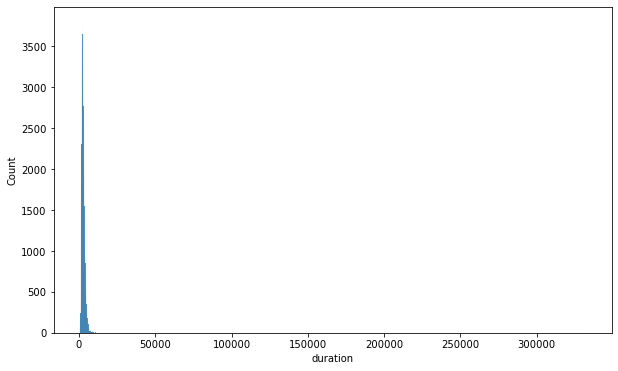

In [393]:
sns.histplot(df.duration.sort_values())

- There are some outlier, and I will drop outliers

In [394]:
df = df[df.duration < 6000]

# Checking each stores average delivery duration

In [395]:
store_ave_time = df.groupby('store_id')['duration'].mean().sort_values()

In [396]:
store_ave_time

store_id
2539     860.000000
5102    1083.000000
5825    1116.000000
5480    1224.500000
743     1281.666667
           ...     
2612    5816.000000
3952    5819.000000
242     5850.000000
887     5859.000000
5926    5929.000000
Name: duration, Length: 5593, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Count'>

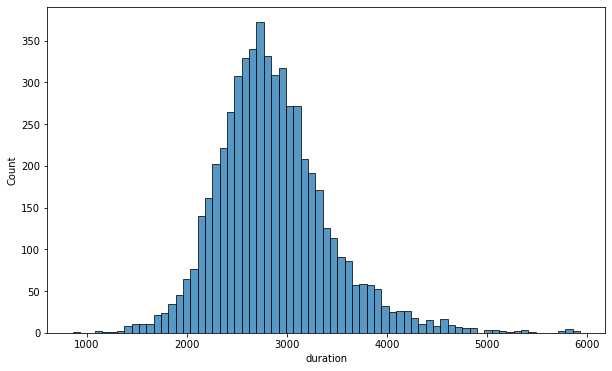

In [397]:
sns.histplot(store_ave_time)

- Created new feature as a Store Speed according to average delivery time of each stores

In [398]:
def store_speed(st_id):
    
    if df[df.store_id==st_id]['duration'].mean() <= 2000:
        val = 'Fast'
    elif df[df.store_id==st_id]['duration'].mean() <= 4000:
        val = 'Normal'
    else:
        val = 'Slow'
    return val

In [399]:
df['Store_Speed'] = df['store_id'].apply(store_speed)

- Created new feature for the order hours

In [400]:
df['orders_hours'] = df.created_at.dt.hour

In [401]:
df['orders_hours']

0         22
1         21
2         20
3         21
4          2
          ..
197423     0
197424     0
197425     4
197426    18
197427    19
Name: orders_hours, Length: 173429, dtype: int64

<AxesSubplot:xlabel='orders_hours', ylabel='duration'>

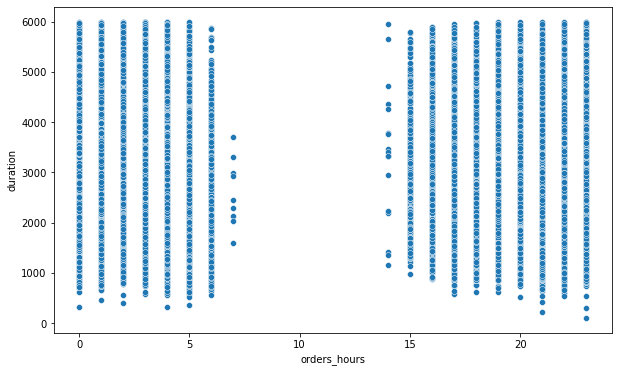

In [402]:
sns.scatterplot(x=df.orders_hours, y=df.duration)

<AxesSubplot:xlabel='orders_hours', ylabel='total_outstanding_orders'>

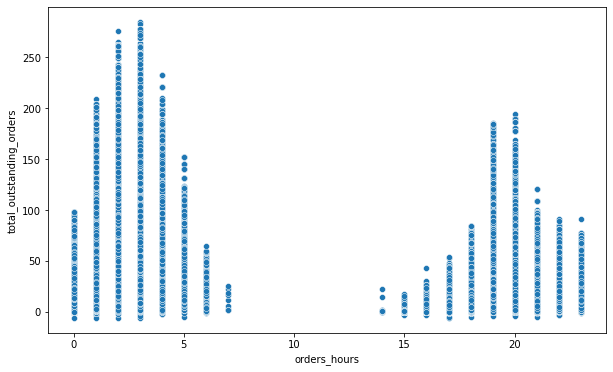

In [403]:
sns.scatterplot(x=df.orders_hours, y=df.total_outstanding_orders)

In [404]:
df[(df.orders_hours >=1) & (df.orders_hours <5)].total_outstanding_orders.mean()

83.13748095425825

In [405]:
df[(df.orders_hours >=1) & (df.orders_hours <5)].total_onshift_dashers.mean()

61.67786858171822

In [406]:
df[((df.orders_hours >=5) & (df.orders_hours <6)) | ((df.orders_hours >=19) & (df.orders_hours <21))].total_outstanding_orders.mean()

42.16516705467816

In [407]:
df[((df.orders_hours >=5) & (df.orders_hours <6)) | ((df.orders_hours >=19) & (df.orders_hours <21))].total_onshift_dashers.mean()

33.365380985339456

In [408]:
df.total_onshift_dashers.mean()

45.80445023611968

In [409]:
df.total_outstanding_orders.mean()

59.13977477815129

- Created a new feature for the time orders created

In [410]:
def f(data):
    if (data >20 ) or (data == 0):
        val = 'Midnight'
    elif (data >18) and (data < 21):
        val = 'Night'
    elif (data > 0) and (data < 6):
        val = 'Morning'       
    else:
        val = 'Daytime'
    return val


In [411]:
df['Time_Category'] = df['orders_hours'].apply(f)

In [412]:
df.sample(4)

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,duration,Store_Speed,orders_hours,Time_Category
32996,2.0,2015-01-28 02:39:17,2015-01-28 03:33:10,3893,5909,88.0,56.0,92.0,679.0,3233.0,Normal,2,Morning
142241,2.0,2015-02-11 17:32:32,2015-02-11 18:03:24,772,1350,13.0,13.0,16.0,643.0,1852.0,Normal,17,Daytime
24030,2.0,2015-02-11 04:47:10,2015-02-11 05:09:42,1869,995,45.0,41.0,41.0,637.0,1352.0,Normal,4,Morning
81563,1.0,2015-02-09 01:52:54,2015-02-09 02:32:14,2025,1363,25.0,21.0,33.0,202.0,2360.0,Normal,1,Morning


<AxesSubplot:xlabel='orders_hours', ylabel='Time_Category'>

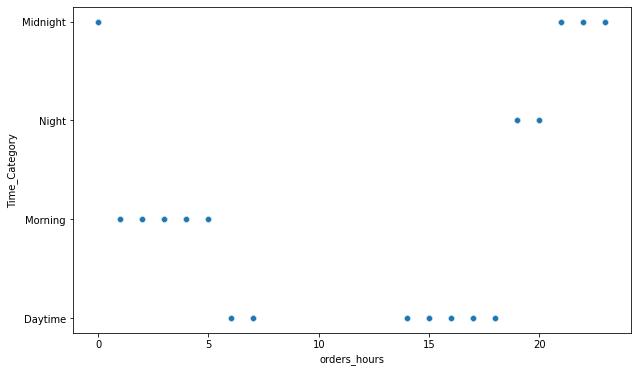

In [413]:
sns.scatterplot(x=df.orders_hours, y=df.Time_Category)

- Created new feature as an unassigned_order, difference between total_outstanding_orders and total_onshift_dashers

In [414]:
df['unassigned_orders'] = df.total_outstanding_orders - df.total_onshift_dashers

In [415]:
df['market_id'] = df['market_id'].astype(object)

In [416]:
df['orders_hours'] = df['orders_hours'].astype(object)

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173429 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     173429 non-null  object        
 1   created_at                                    173429 non-null  datetime64[ns]
 2   actual_delivery_time                          173429 non-null  datetime64[ns]
 3   store_id                                      173429 non-null  int64         
 4   subtotal                                      173429 non-null  int64         
 5   total_onshift_dashers                         173429 non-null  float64       
 6   total_busy_dashers                            173429 non-null  float64       
 7   total_outstanding_orders                      173429 non-null  float64       
 8   estimated_store_to_consumer_driving_duration  173429 n

<AxesSubplot:>

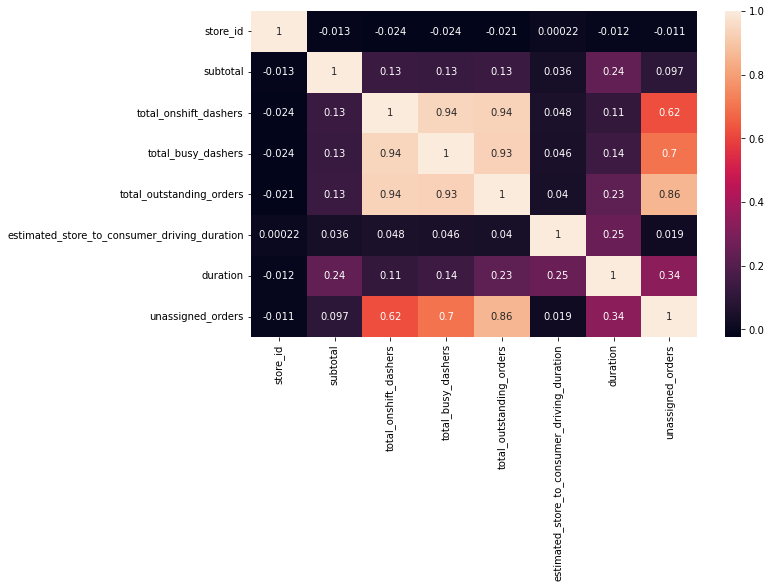

In [418]:
sns.heatmap(df.corr(), annot = True )

In [310]:
df.drop(['created_at','actual_delivery_time', 'total_outstanding_orders'], inplace=True, axis = 1)

In [311]:
df = pd.get_dummies(df)

In [312]:
df.head()

,store_id,subtotal,total_onshift_dashers,total_busy_dashers,estimated_store_to_consumer_driving_duration,duration,unassigned_orders,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0,Store_Speed_Fast,Store_Speed_Normal,Store_Speed_Slow,orders_hours_0,orders_hours_1,orders_hours_2,orders_hours_3,orders_hours_4,orders_hours_5,orders_hours_6,orders_hours_7,orders_hours_14,orders_hours_15,orders_hours_16,orders_hours_17,orders_hours_18,orders_hours_19,orders_hours_20,orders_hours_21,orders_hours_22,orders_hours_23,Time_Category_Daytime,Time_Category_Midnight,Time_Category_Morning,Time_Category_Night
0,1845,3441,33.0,14.0,861.0,3779.0,-12.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,5477,1900,1.0,2.0,690.0,4024.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,5477,1900,1.0,0.0,690.0,1781.0,-1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,5477,6900,1.0,1.0,289.0,3075.0,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,5477,3900,6.0,6.0,650.0,2390.0,3.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [313]:
X = df.drop('duration', axis = 1)
y = df.duration

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [315]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()

In [316]:
scaler.fit(X_train)

MinMaxScaler()

In [317]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.91425709, 0.12817164, 0.68571429, ..., 0.        , 1.        ,
        0.        ],
       [0.04866877, 0.11044776, 0.21714286, ..., 0.        , 1.        ,
        0.        ],
       [0.59390209, 0.14985075, 0.04      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.40352133, 0.09664179, 0.05142857, ..., 0.        , 0.        ,
        0.        ],
       [0.13154881, 0.1511194 , 0.46857143, ..., 0.        , 1.        ,
        0.        ],
       [0.87732608, 0.13246269, 0.09714286, ..., 0.        , 0.        ,
        0.        ]])

In [318]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.54566275, 0.24608209, 0.41142857, ..., 0.        , 1.        ,
        0.        ],
       [0.79573433, 0.09496269, 0.26857143, ..., 0.        , 1.        ,
        0.        ],
       [0.91883768, 0.10970149, 0.80571429, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.85800172, 0.10037313, 0.10857143, ..., 0.        , 1.        ,
        0.        ],
       [0.05525336, 0.09048507, 0.11428571, ..., 1.        , 0.        ,
        0.        ],
       [0.19667907, 0.09794776, 0.36571429, ..., 0.        , 0.        ,
        1.        ]])

In [319]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [320]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [321]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [322]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {
        
    i+"_train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))
                },
    
    i+"_test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))
               }
        
            }
    return pd.DataFrame(scores)

In [323]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.301212,0.297431
mae,616.782989,625.288135
mse,625214.074978,645857.474629
rmse,790.704796,803.652583


In [324]:
lm.coef_

array([-1.25182822e+01,  2.46491823e+03, -4.71907198e+02, -8.01345270e+02,
        1.79476026e+03,  3.47882935e+03,  8.24975285e+14,  8.24975285e+14,
        8.24975285e+14,  8.24975285e+14,  8.24975285e+14,  8.24975285e+14,
        9.20581940e+13,  9.20581940e+13,  9.20581940e+13, -3.76707458e+15,
        2.41405786e+15,  2.41405786e+15,  2.41405786e+15,  2.41405786e+15,
        2.41405786e+15, -1.03797377e+14, -1.03797377e+14, -1.03797377e+14,
       -1.03797377e+14, -1.03797377e+14, -1.03797377e+14, -1.03797377e+14,
       -6.89783844e+15, -6.89783844e+15, -3.76707458e+15, -3.76707458e+15,
       -3.76707458e+15,  2.89748793e+13,  3.69225208e+15, -2.48888036e+15,
        6.82301594e+15])

In [325]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [88]:
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.905784,0.324170
mae,224.313242,613.736406
mse,84296.211905,621277.597425
rmse,290.338099,788.211645


In [89]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [90]:
rf_model.feature_importances_

array([1.19682803e-01, 1.60821220e-01, 8.54174368e-02, 9.33752089e-02,
       1.78954135e-01, 2.01626691e-01, 1.61505502e-02, 8.30798076e-03,
       7.84132839e-03, 7.35697759e-03, 6.49148423e-03, 8.00787633e-04,
       8.17213491e-04, 1.49530211e-03, 1.56370721e-02, 4.31933962e-03,
       8.25454675e-03, 1.45061803e-02, 8.00309937e-03, 6.17587730e-03,
       5.24423977e-03, 1.11730955e-03, 1.19127640e-05, 3.65020803e-05,
       5.15035547e-04, 1.36631094e-03, 1.79999449e-03, 2.24693258e-03,
       4.16804200e-03, 4.17599141e-03, 3.85520901e-03, 3.65291291e-03,
       3.38590921e-03, 2.75770568e-03, 4.04548506e-03, 1.15660196e-02,
       4.01925235e-03])

# SVM

In [91]:
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
svr_model = LinearSVR()

In [93]:
svr_model.fit(X_train_scaled, y_train)

LinearSVR()

In [95]:
train_val(svr_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.238042,0.235207
mae,625.442627,632.730900
mse,681733.297221,703059.453566
rmse,825.671422,838.486406


# XGBoost

In [326]:
from xgboost import XGBRegressor

In [327]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror") 

In [328]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [329]:
train_val(xgb_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.442542,0.374780
mae,546.039753,584.926177
mse,498764.257257,574752.185019
rmse,706.232439,758.124122


# EDA Predicted Data

In [345]:
df_pred = pd.read_csv('predict_data.csv')

In [346]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     54528 non-null  float64
 1   created_at                                    54778 non-null  object 
 2   store_id                                      54778 non-null  int64  
 3   subtotal                                      54778 non-null  int64  
 4   total_onshift_dashers                         50145 non-null  float64
 5   total_busy_dashers                            50145 non-null  float64
 6   total_outstanding_orders                      50145 non-null  float64
 7   estimated_store_to_consumer_driving_duration  54767 non-null  float64
 8   delivery_id                                   54778 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 3.8+ MB


In [347]:
df_pred = df_pred.dropna(subset=['market_id','total_onshift_dashers','total_busy_dashers','total_outstanding_orders', 'estimated_store_to_consumer_driving_duration' ])

In [348]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49913 entries, 0 to 54777
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     49913 non-null  float64
 1   created_at                                    49913 non-null  object 
 2   store_id                                      49913 non-null  int64  
 3   subtotal                                      49913 non-null  int64  
 4   total_onshift_dashers                         49913 non-null  float64
 5   total_busy_dashers                            49913 non-null  float64
 6   total_outstanding_orders                      49913 non-null  float64
 7   estimated_store_to_consumer_driving_duration  49913 non-null  float64
 8   delivery_id                                   49913 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 3.8+ MB


In [349]:
df_pred.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,49913.0,2.796526,1.340086,1.0,2.0,2.0,4.0,6.0
store_id,49913.0,3508.048384,2053.769710,2.0,1683.0,3573.0,5268.0,6986.0
subtotal,49913.0,2728.935187,1901.862645,0.0,1425.0,2241.0,3448.0,29925.0
total_onshift_dashers,49913.0,49.070623,37.595197,-1.0,19.0,41.0,71.0,175.0
total_busy_dashers,49913.0,43.506221,34.046571,-4.0,16.0,36.0,63.0,169.0
total_outstanding_orders,49913.0,62.549356,56.363563,-9.0,19.0,45.0,91.0,292.0
estimated_store_to_consumer_driving_duration,49913.0,548.266844,218.932825,0.0,386.0,545.0,703.0,1550.0
delivery_id,49913.0,126164.703123,72713.665883,20.0,62982.0,126310.0,188951.0,252031.0


In [350]:
df_pred = df_pred[(df_pred.total_onshift_dashers > 0) | (df_pred.total_busy_dashers > 0) | (df_pred.total_outstanding_orders > 0)]

In [351]:
df_pred.shape

(49046, 9)

# Checking Ourliers

<AxesSubplot:xlabel='total_outstanding_orders'>

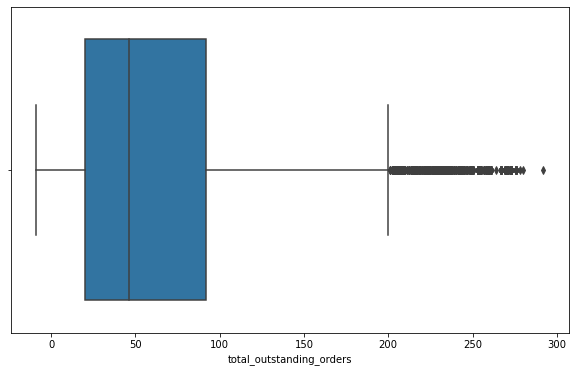

In [352]:
sns.boxplot(df_pred.total_outstanding_orders)

<AxesSubplot:xlabel='total_busy_dashers'>

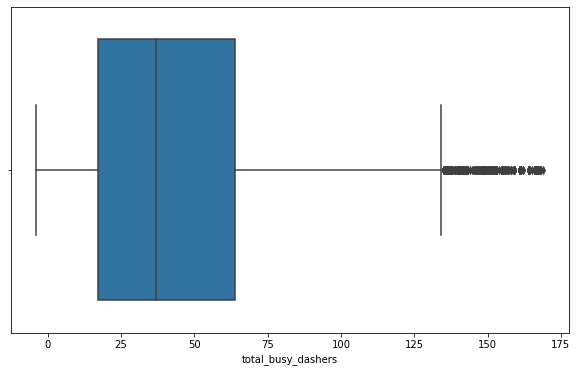

In [353]:
sns.boxplot(df_pred.total_busy_dashers)

<AxesSubplot:xlabel='total_onshift_dashers'>

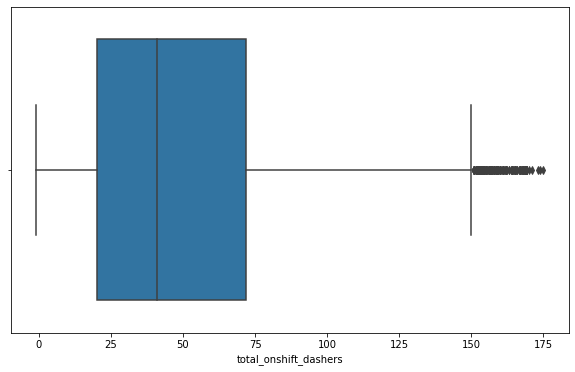

In [354]:
sns.boxplot(df_pred.total_onshift_dashers)

<AxesSubplot:xlabel='estimated_store_to_consumer_driving_duration'>

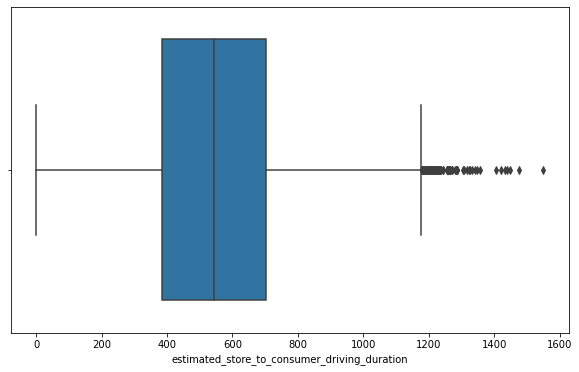

In [355]:
sns.boxplot(df_pred.estimated_store_to_consumer_driving_duration)

In [356]:
df_pred[df_pred.estimated_store_to_consumer_driving_duration <60]

,market_id,created_at,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id
8,1.0,2015-02-25 04:19:59,5058,2179,20.0,24.0,28.0,54.0,107026
9,1.0,2015-02-22 02:24:32,5058,1800,26.0,26.0,20.0,54.0,90341
631,4.0,2015-02-22 03:52:53,265,5680,79.0,65.0,114.0,34.0,227540
1927,4.0,2015-02-22 00:44:26,703,2361,36.0,33.0,52.0,39.0,19786
2067,3.0,2015-02-22 03:47:03,4703,9460,42.0,41.0,44.0,49.0,41166
...,...,...,...,...,...,...,...,...,...
48279,4.0,2015-02-21 03:10:08,377,1450,101.0,98.0,174.0,58.0,135174
50984,2.0,2015-02-24 03:46:34,2130,2940,73.0,69.0,90.0,38.0,100838
51800,1.0,2015-02-22 17:39:09,6171,2095,5.0,5.0,5.0,56.0,116348
52565,1.0,2015-02-21 06:30:02,3463,1025,1.0,1.0,4.0,51.0,43972


In [357]:
df_pred = df_pred[df_pred.estimated_store_to_consumer_driving_duration >60]

In [358]:
df_pred['created_at'] =  pd.to_datetime(df_pred['created_at'])

In [359]:
def store_speed_pred(st_id):
    
    if st_id in df.store_id.unique():
        val = df[df.store_id==st_id].iloc[0].Store_Speed
    else:
        val = 'Normal'
    return val

In [419]:
df_pred['Store_Speed'] = df_pred['store_id'].apply(store_speed_pred)

In [361]:
df_pred.head()

,market_id,created_at,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id
0,3.0,2015-02-25 02:22:30,5477,7500,4.0,4.0,4.0,670.0,194096
1,3.0,2015-02-25 01:14:19,5477,7100,4.0,1.0,1.0,446.0,236895
2,4.0,2015-02-22 02:27:44,5477,4500,9.0,7.0,6.0,504.0,190868
3,3.0,2015-02-25 01:32:39,5477,1700,3.0,3.0,3.0,687.0,183076
4,1.0,2015-02-24 05:20:45,2841,3150,4.0,4.0,4.0,528.0,186200


In [229]:
df_pred['created_at'] =  pd.to_datetime(df_pred['created_at'])

In [230]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48975 entries, 0 to 54777
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   market_id                                     48975 non-null  float64       
 1   created_at                                    48975 non-null  datetime64[ns]
 2   store_id                                      48975 non-null  int64         
 3   subtotal                                      48975 non-null  int64         
 4   total_onshift_dashers                         48975 non-null  float64       
 5   total_busy_dashers                            48975 non-null  float64       
 6   total_outstanding_orders                      48975 non-null  float64       
 7   estimated_store_to_consumer_driving_duration  48975 non-null  float64       
 8   delivery_id                                   48975 non-null  int6

In [231]:
df_pred['orders_hours'] = df_pred.created_at.dt.hour

In [232]:
df_pred['orders_hours']

0         2
1         1
2         2
3         1
4         5
         ..
54773    18
54774    21
54775    18
54776    23
54777     2
Name: orders_hours, Length: 48975, dtype: int64

In [233]:
def f(data):
    if (data >20 ) or (data == 0):
        val = 'Midnight'
    elif (data >18) and (data < 21):
        val = 'Night'
    elif (data > 0) and (data < 6):
        val = 'Morning'       
    else:
        val = 'Daytime'
    return val


In [234]:
df_pred['Time_Category'] = df_pred['orders_hours'].apply(f)

In [235]:
df_pred.head()

,market_id,created_at,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id,Store_Speed,orders_hours,Time_Category
0,3.0,2015-02-25 02:22:30,5477,7500,4.0,4.0,4.0,670.0,194096,Normal,2,Morning
1,3.0,2015-02-25 01:14:19,5477,7100,4.0,1.0,1.0,446.0,236895,Normal,1,Morning
2,4.0,2015-02-22 02:27:44,5477,4500,9.0,7.0,6.0,504.0,190868,Normal,2,Morning
3,3.0,2015-02-25 01:32:39,5477,1700,3.0,3.0,3.0,687.0,183076,Normal,1,Morning
4,1.0,2015-02-24 05:20:45,2841,3150,4.0,4.0,4.0,528.0,186200,Normal,5,Morning


In [236]:
df_pred['unassigned_orders'] = df_pred.total_outstanding_orders - df_pred.total_onshift_dashers

In [237]:
df_pred.head()

,market_id,created_at,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id,Store_Speed,orders_hours,Time_Category,unassigned_orders
0,3.0,2015-02-25 02:22:30,5477,7500,4.0,4.0,4.0,670.0,194096,Normal,2,Morning,0.0
1,3.0,2015-02-25 01:14:19,5477,7100,4.0,1.0,1.0,446.0,236895,Normal,1,Morning,-3.0
2,4.0,2015-02-22 02:27:44,5477,4500,9.0,7.0,6.0,504.0,190868,Normal,2,Morning,-3.0
3,3.0,2015-02-25 01:32:39,5477,1700,3.0,3.0,3.0,687.0,183076,Normal,1,Morning,0.0
4,1.0,2015-02-24 05:20:45,2841,3150,4.0,4.0,4.0,528.0,186200,Normal,5,Morning,0.0


In [238]:
df_pred['market_id'] = df_pred['market_id'].astype(object)

In [239]:
df_pred['orders_hours'] = df_pred['orders_hours'].astype(object)

In [240]:
df_pred.drop(['created_at', 'total_outstanding_orders'], inplace=True, axis = 1)

In [241]:
df_pred.head()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,estimated_store_to_consumer_driving_duration,delivery_id,Store_Speed,orders_hours,Time_Category,unassigned_orders
0,3.0,5477,7500,4.0,4.0,670.0,194096,Normal,2,Morning,0.0
1,3.0,5477,7100,4.0,1.0,446.0,236895,Normal,1,Morning,-3.0
2,4.0,5477,4500,9.0,7.0,504.0,190868,Normal,2,Morning,-3.0
3,3.0,5477,1700,3.0,3.0,687.0,183076,Normal,1,Morning,0.0
4,1.0,2841,3150,4.0,4.0,528.0,186200,Normal,5,Morning,0.0


In [422]:
df_pred_delivery_id = df_pred['delivery_id']

In [244]:
df_pred = df_pred.drop('delivery_id', axis = 1)

In [246]:
df_pred = pd.get_dummies(df_pred)

In [247]:
df_pred.head()

,store_id,subtotal,total_onshift_dashers,total_busy_dashers,estimated_store_to_consumer_driving_duration,unassigned_orders,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0,Store_Speed_Fast,Store_Speed_Normal,Store_Speed_Slow,orders_hours_0,orders_hours_1,orders_hours_2,orders_hours_3,orders_hours_4,orders_hours_5,orders_hours_6,orders_hours_7,orders_hours_14,orders_hours_15,orders_hours_16,orders_hours_17,orders_hours_18,orders_hours_19,orders_hours_20,orders_hours_21,orders_hours_22,orders_hours_23,Time_Category_Daytime,Time_Category_Midnight,Time_Category_Morning,Time_Category_Night
0,5477,7500,4.0,4.0,670.0,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5477,7100,4.0,1.0,446.0,-3.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5477,4500,9.0,7.0,504.0,-3.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5477,1700,3.0,3.0,687.0,0.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2841,3150,4.0,4.0,528.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [248]:
df_pred_2 = df_pred.copy()

# XGBOOST

In [330]:
y_pred = xgb_model.predict(df_pred)

In [421]:
y_pred

array([3360.6511, 2942.3818, 3190.153 , ..., 2476.0771, 3250.9568,
       2560.7698], dtype=float32)

In [439]:
df_pred_delivery_id

0        194096
1        236895
2        190868
3        183076
4        186200
          ...  
54773    174203
54774    138333
54775     34110
54776    178028
54777    132824
Name: delivery_id, Length: 48975, dtype: int64

In [454]:
y_pred_dataframe = pd.DataFrame({'prediction':y_pred})

In [455]:
y_pred_dataframe

,prediction
0,3360.651123
1,2942.381836
2,3190.153076
3,3137.136719
4,2583.924805
...,...
48970,2700.897217
48971,2566.305664
48972,2476.077148
48973,3250.956787


In [440]:
df_pred_delivery_id = df_pred_delivery_id.reset_index(drop=True)

In [441]:
df_pred_delivery_id

0        194096
1        236895
2        190868
3        183076
4        186200
          ...  
48970    174203
48971    138333
48972     34110
48973    178028
48974    132824
Name: delivery_id, Length: 48975, dtype: int64

In [456]:
final_pred = pd.concat([df_pred_delivery_id, y_pred_dataframe ], axis = 1)

In [457]:
final_pred

,delivery_id,prediction
0,194096,3360.651123
1,236895,2942.381836
2,190868,3190.153076
3,183076,3137.136719
4,186200,2583.924805
...,...,...
48970,174203,2700.897217
48971,138333,2566.305664
48972,34110,2476.077148
48973,178028,3250.956787


In [460]:
final_pred.to_csv('a1.csv', encoding='utf-8', index=False)